<a href="https://colab.research.google.com/github/pankaja0285/era_v1_session10_pankaja/blob/main/CiFAR_S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect to colab and set path

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/ERA_V1/era_v1_session11_pankaja/"

/content/drive/.shortcut-targets-by-id/1-6MnhTGmh9cKMnV1jvA5tNykW7H3nRYs/era_v1_session11_pankaja


### Install libraries

In [ ]:
import os

In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git
# %pip install torchsummary
# %pip install torch-lr-finder
# %pip install hiddenlayer
# %pip install seaborn
!pip install -r requirements.txt

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-szbpdism
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-szbpdism
  Resolved https://github.com/albumentations-team/albumentations.git to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py) ... done
  Created wheel for albumentations: filename=albumentations-1.3.1-py3-none-any.whl size=125700 sha256=3b8f01572a08122c3af22adcb008b1fb886c2280275c619895cfce12b18725e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-4vnbxkal/wheels/f9/34/b6/eb7adf92e69b5629d7de6904c0d4ac4e5050b18ce065bab4e1
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.4 MB/s eta 0:00:00
  Install

### Import libraries

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import argparse
%matplotlib inline
from main import *


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### With RandomCrop ONLY

In [ ]:
# Set up argparse arguments for running
parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training And Apply Grad-CAM...')
parser.add_argument('--lr', default=0.1, type=float, help='learning rate')
parser.add_argument('--resume', '-r', action='store_true',
                    help='resume from checkpoint')
parser.add_argument('--model_type', default="resnet18", type=str, help='model type to train')
parser.add_argument('--save_path', default="saved_models", type=str, help='path to save model')
parser.add_argument('--cam_img_size', default="128", type=str, help='Grad-CAM img size')
parser.add_argument('--apply_alb_cutout', default="N", type=str, help='Apply Albumentation cutout')
parser.add_argument('--apply_alb_cutout_size', default="0", type=str, help='Apply Albumentation cutout')

# Use below to avoid notebook error - "Error SystemExit: 2"
parser.add_argument("-f", "--file", required=False)

args = parser.parse_args()
p_args = ',\n'.join(f'{k}={v}' for k, v in vars(args).items() if k != "file")
print(f"Arguments for the current run:\n{p_args}")
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device


Arguments for the current run:
lr=0.1,
resume=False,
model_type=resnet18,
save_path=saved_models,
cam_img_size=128,
apply_alb_cutout=N,
apply_alb_cutout_size=0


Loading Configuration of your experiment..

Get train and test dataloaders..
Files already downloaded and verified
Files already downloaded and verified

Visualizing sample images..


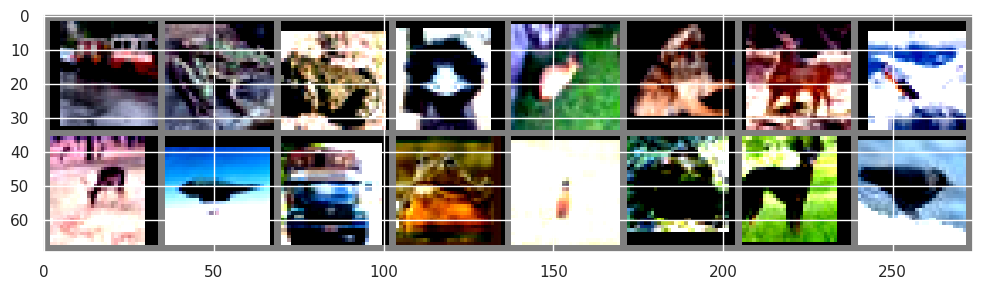

In [ ]:
# show sample images
show_sample_images()


Loading Configuration of your experiment..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_padding': 4,
                                'cutout_prob': 0.5,
                                'cutout_size': 8,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate_limit': 15,
                                'shiftscalerotate_prob': 0.25},
                       'type': 'CIFAR10AlbumentationS9'},
 'data_loader': {'args': {'batch_size': 512,
                          'num_workers': 2,
                          'pin_memory': True,
                          'test_batch_size': 100,
                          'train_batch_size': 128},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             

Loss=1.2150778770446777 Batch_id=390 LR=0.01044 Accuracy=46.15: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.0167, Accuracy: 4698/10000 (46.98%)

Epoch 2:


Loss=0.9838286638259888 Batch_id=390 LR=0.02802 Accuracy=62.80: 100%|██████████| 391/391 [00:46<00:00,  8.33it/s]



Test set: Average loss: 0.0124, Accuracy: 5908/10000 (59.08%)

Epoch 3:


Loss=0.8441038131713867 Batch_id=390 LR=0.05203 Accuracy=68.78: 100%|██████████| 391/391 [00:48<00:00,  8.12it/s]



Test set: Average loss: 0.0148, Accuracy: 5105/10000 (51.05%)

Epoch 4:


Loss=0.9393081665039062 Batch_id=390 LR=0.07604 Accuracy=70.63: 100%|██████████| 391/391 [00:47<00:00,  8.22it/s]



Test set: Average loss: 0.0196, Accuracy: 4329/10000 (43.29%)

Epoch 5:


Loss=0.7855894565582275 Batch_id=390 LR=0.09360 Accuracy=69.85: 100%|██████████| 391/391 [00:47<00:00,  8.25it/s]



Test set: Average loss: 0.0183, Accuracy: 4824/10000 (48.24%)

Epoch 6:


Loss=0.9729272723197937 Batch_id=390 LR=0.10000 Accuracy=70.09: 100%|██████████| 391/391 [00:47<00:00,  8.21it/s]



Test set: Average loss: 0.0104, Accuracy: 6584/10000 (65.84%)

Epoch 7:


Loss=0.8331437110900879 Batch_id=390 LR=0.09874 Accuracy=70.63: 100%|██████████| 391/391 [00:47<00:00,  8.23it/s]



Test set: Average loss: 0.0128, Accuracy: 5984/10000 (59.84%)

Epoch 8:


Loss=0.8836102485656738 Batch_id=390 LR=0.09504 Accuracy=70.76: 100%|██████████| 391/391 [00:47<00:00,  8.24it/s]



Test set: Average loss: 0.0152, Accuracy: 5147/10000 (51.47%)

Epoch 9:


Loss=0.6674610376358032 Batch_id=390 LR=0.08907 Accuracy=71.08: 100%|██████████| 391/391 [00:47<00:00,  8.25it/s]



Test set: Average loss: 0.0118, Accuracy: 6009/10000 (60.09%)

Epoch 10:


Loss=0.8182746171951294 Batch_id=390 LR=0.08115 Accuracy=71.24: 100%|██████████| 391/391 [00:47<00:00,  8.26it/s]



Test set: Average loss: 0.0162, Accuracy: 5180/10000 (51.80%)

Epoch 11:


Loss=0.8111208081245422 Batch_id=390 LR=0.07167 Accuracy=71.97: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]



Test set: Average loss: 0.0162, Accuracy: 4745/10000 (47.45%)

Epoch 12:


Loss=0.6599413752555847 Batch_id=390 LR=0.06110 Accuracy=72.85: 100%|██████████| 391/391 [00:47<00:00,  8.27it/s]



Test set: Average loss: 0.0101, Accuracy: 6675/10000 (66.75%)

Epoch 13:


Loss=0.7226729393005371 Batch_id=390 LR=0.04997 Accuracy=73.39: 100%|██████████| 391/391 [00:47<00:00,  8.26it/s]



Test set: Average loss: 0.0089, Accuracy: 6866/10000 (68.66%)

Epoch 14:


Loss=0.7696340084075928 Batch_id=390 LR=0.03885 Accuracy=74.41: 100%|██████████| 391/391 [00:47<00:00,  8.28it/s]



Test set: Average loss: 0.0167, Accuracy: 5250/10000 (52.50%)

Epoch 15:


Loss=0.5786117911338806 Batch_id=390 LR=0.02828 Accuracy=75.86: 100%|██████████| 391/391 [00:47<00:00,  8.27it/s]



Test set: Average loss: 0.0092, Accuracy: 6985/10000 (69.85%)

Epoch 16:


Loss=0.9095058441162109 Batch_id=390 LR=0.01880 Accuracy=77.75: 100%|██████████| 391/391 [00:47<00:00,  8.28it/s]



Test set: Average loss: 0.0075, Accuracy: 7491/10000 (74.91%)

Epoch 17:


Loss=0.5089443325996399 Batch_id=390 LR=0.01089 Accuracy=80.42: 100%|██████████| 391/391 [00:47<00:00,  8.25it/s]



Test set: Average loss: 0.0078, Accuracy: 7459/10000 (74.59%)

Epoch 18:


Loss=0.3583541512489319 Batch_id=390 LR=0.00494 Accuracy=83.67: 100%|██████████| 391/391 [00:47<00:00,  8.26it/s]



Test set: Average loss: 0.0046, Accuracy: 8458/10000 (84.58%)

Epoch 19:


Loss=0.29571303725242615 Batch_id=390 LR=0.00125 Accuracy=87.68: 100%|██████████| 391/391 [00:47<00:00,  8.29it/s]



Test set: Average loss: 0.0035, Accuracy: 8814/10000 (88.14%)

Epoch 20:


Loss=0.34160885214805603 Batch_id=390 LR=0.00000 Accuracy=91.05: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]



Test set: Average loss: 0.0031, Accuracy: 8917/10000 (89.17%)


Save experiment..
Saving the model for CiFar_Model_RES18

Saving weights as pth file..

Plot metrics..


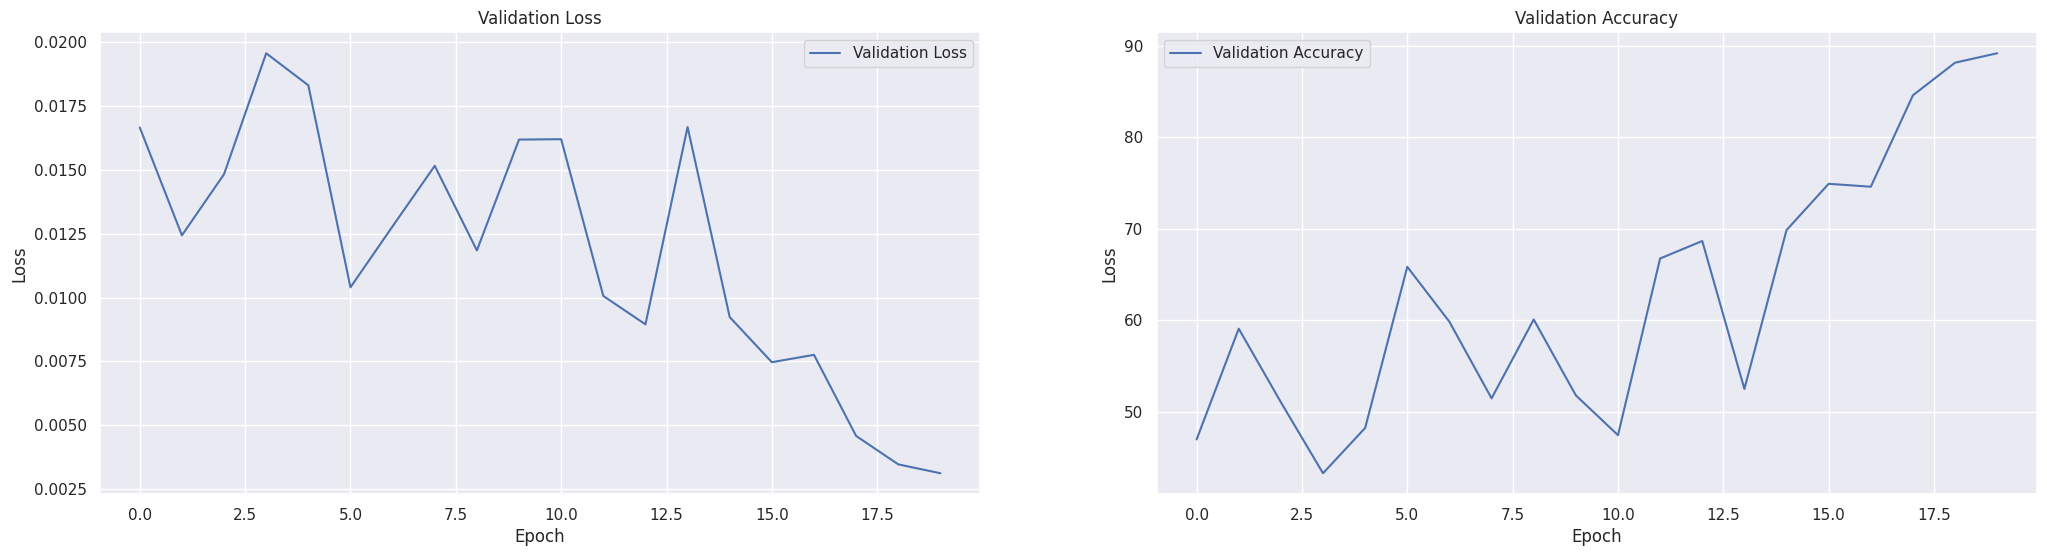



Plot misclassified images..
Total wrong predictions are 1083
Files already downloaded and verified


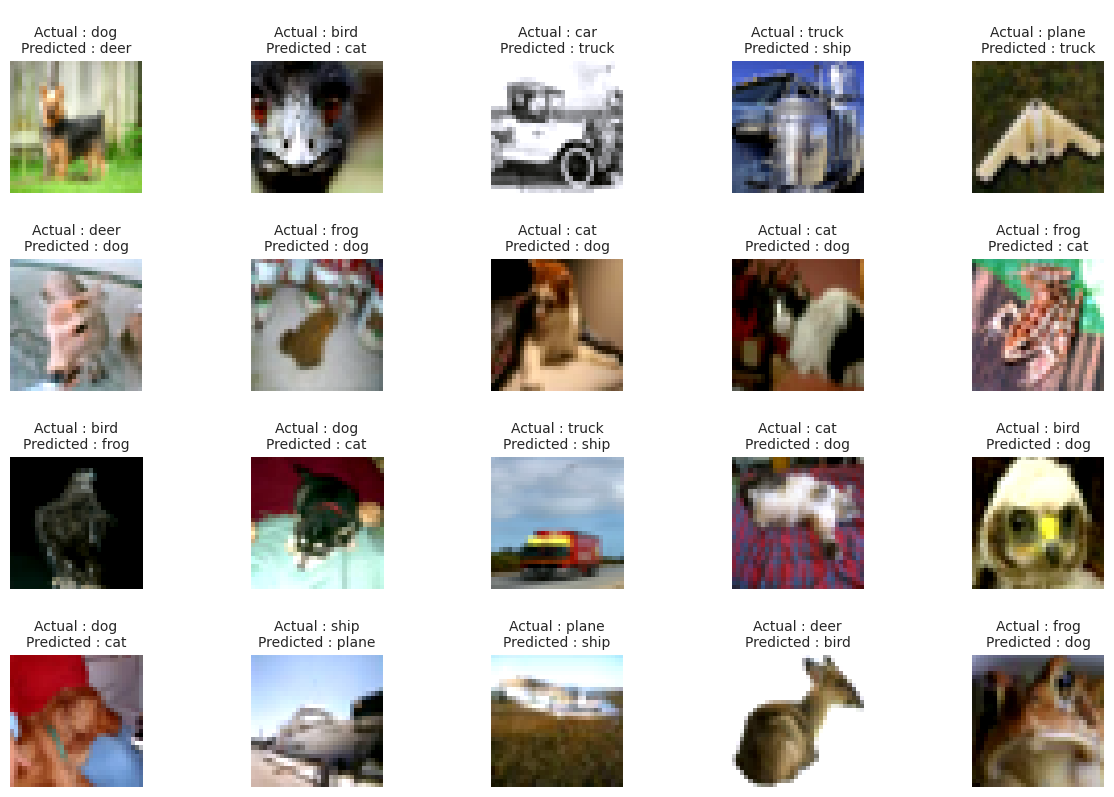



Plot gradCAM images..
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


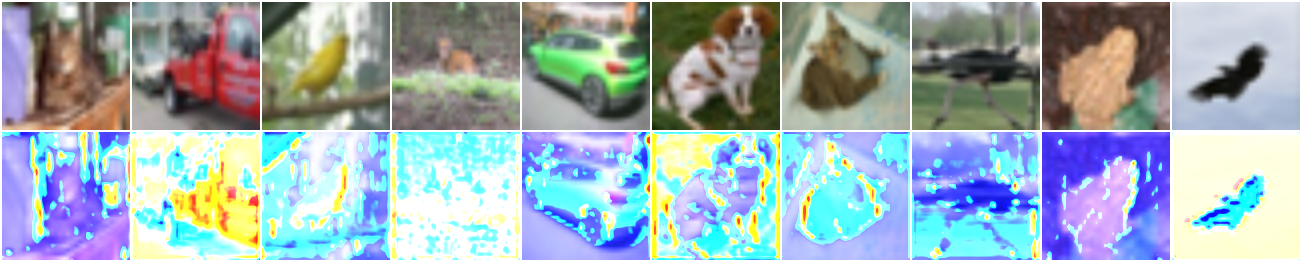



Display model accuracy for 10 classes..
Accuracy of plane : 93 %
Accuracy of   car : 96 %
Accuracy of  bird : 84 %
Accuracy of   cat : 74 %
Accuracy of  deer : 89 %
Accuracy of   dog : 84 %
Accuracy of  frog : 91 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %

DONE!


In [ ]:
# Run - to train ResNet18 model, predict, apply and plot Grad-CAM images
run_CiFAR_Resnet_GradCAM_process(args)


### With Cutout applied via Albumentations

In [ ]:
# Set up argparse arguments for running
parser2 = argparse.ArgumentParser(description='PyTorch CIFAR10 Training And Apply Grad-CAM...')
parser2.add_argument('--lr', default=0.1, type=float, help='learning rate')
parser2.add_argument('--resume', '-r', action='store_true',
                    help='resume from checkpoint')
parser2.add_argument('--model_type', default="resnet18", type=str, help='model type to train')
parser2.add_argument('--save_path', default="saved_models", type=str, help='path to save model')
parser2.add_argument('--cam_img_size', default="128", type=str, help='Grad-CAM img size')
parser2.add_argument('--apply_alb_cutout', default="Y", type=str, help='Apply Albumentation cutout')
parser2.add_argument('--apply_alb_cutout_size', default="16", type=str, help='Apply Albumentation cutout')

# Use below to avoid notebook error - "Error SystemExit: 2"
parser2.add_argument("-f", "--file", required=False)

args_2 = parser2.parse_args()
p_args2 = ',\n'.join(f'{k}={v}' for k, v in vars(args_2).items() if k != "file")
print(f"Arguments for the current run with cutout applied via Albumentations:\n{p_args2}")

Arguments for the current run with cutout applied via Albumentations:
lr=0.1,
resume=False,
model_type=resnet18,
save_path=saved_models,
cam_img_size=128,
apply_alb_cutout=Y,
apply_alb_cutout_size=16


In [ ]:
# # show sample images
# show_sample_images()

Loading Configuration of your experiment..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_padding': 4,
                                'cutout_prob': 0.5,
                                'cutout_size': 8,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate_limit': 15,
                                'shiftscalerotate_prob': 0.25},
                       'type': 'CIFAR10AlbumentationS9'},
 'data_loader': {'args': {'batch_size': 512,
                          'num_workers': 2,
                          'pin_memory': True,
                          'test_batch_size': 100,
                          'train_batch_size': 128},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             

Loss=1.408050298690796 Batch_id=390 LR=0.01044 Accuracy=41.91: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]



Test set: Average loss: 0.0148, Accuracy: 4829/10000 (48.29%)

Epoch 2:


Loss=1.2720553874969482 Batch_id=390 LR=0.02802 Accuracy=54.15: 100%|██████████| 391/391 [00:47<00:00,  8.20it/s]



Test set: Average loss: 0.0140, Accuracy: 5251/10000 (52.51%)

Epoch 3:


Loss=1.0070059299468994 Batch_id=390 LR=0.05203 Accuracy=59.98: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]



Test set: Average loss: 0.0128, Accuracy: 5564/10000 (55.64%)

Epoch 4:


Loss=1.0282317399978638 Batch_id=390 LR=0.07604 Accuracy=61.22: 100%|██████████| 391/391 [00:47<00:00,  8.25it/s]



Test set: Average loss: 0.0198, Accuracy: 4243/10000 (42.43%)

Epoch 5:


Loss=0.9997164011001587 Batch_id=390 LR=0.09360 Accuracy=60.75: 100%|██████████| 391/391 [00:47<00:00,  8.26it/s]



Test set: Average loss: 0.0129, Accuracy: 5702/10000 (57.02%)

Epoch 6:


Loss=1.2593687772750854 Batch_id=390 LR=0.10000 Accuracy=61.03: 100%|██████████| 391/391 [00:47<00:00,  8.27it/s]



Test set: Average loss: 0.0143, Accuracy: 5286/10000 (52.86%)

Epoch 7:


Loss=1.0865665674209595 Batch_id=390 LR=0.09874 Accuracy=61.19: 100%|██████████| 391/391 [00:47<00:00,  8.29it/s]



Test set: Average loss: 0.0134, Accuracy: 5568/10000 (55.68%)

Epoch 8:


Loss=1.192199468612671 Batch_id=390 LR=0.09504 Accuracy=61.64: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]



Test set: Average loss: 0.0128, Accuracy: 5804/10000 (58.04%)

Epoch 9:


Loss=0.9260819554328918 Batch_id=390 LR=0.08907 Accuracy=62.16: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]



Test set: Average loss: 0.0128, Accuracy: 5728/10000 (57.28%)

Epoch 10:


Loss=1.0646792650222778 Batch_id=390 LR=0.08115 Accuracy=62.73: 100%|██████████| 391/391 [00:47<00:00,  8.28it/s]



Test set: Average loss: 0.0218, Accuracy: 3507/10000 (35.07%)

Epoch 11:


Loss=0.9541743993759155 Batch_id=390 LR=0.07167 Accuracy=62.84: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]



Test set: Average loss: 0.0147, Accuracy: 5144/10000 (51.44%)

Epoch 12:


Loss=1.136525273323059 Batch_id=390 LR=0.06110 Accuracy=63.49: 100%|██████████| 391/391 [00:46<00:00,  8.33it/s]



Test set: Average loss: 0.0139, Accuracy: 5707/10000 (57.07%)

Epoch 13:


Loss=0.8730143308639526 Batch_id=390 LR=0.04997 Accuracy=64.52: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]



Test set: Average loss: 0.0098, Accuracy: 6679/10000 (66.79%)

Epoch 14:


Loss=0.9608651399612427 Batch_id=390 LR=0.03885 Accuracy=65.89: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]



Test set: Average loss: 0.0185, Accuracy: 4978/10000 (49.78%)

Epoch 15:


Loss=0.961267352104187 Batch_id=390 LR=0.02828 Accuracy=67.31: 100%|██████████| 391/391 [00:46<00:00,  8.32it/s]



Test set: Average loss: 0.0106, Accuracy: 6355/10000 (63.55%)

Epoch 16:


Loss=0.9921770095825195 Batch_id=390 LR=0.01880 Accuracy=69.36: 100%|██████████| 391/391 [00:46<00:00,  8.34it/s]



Test set: Average loss: 0.0088, Accuracy: 7092/10000 (70.92%)

Epoch 17:


Loss=0.6790910363197327 Batch_id=390 LR=0.01089 Accuracy=72.23: 100%|██████████| 391/391 [00:46<00:00,  8.34it/s]



Test set: Average loss: 0.0079, Accuracy: 7240/10000 (72.40%)

Epoch 18:


Loss=0.5224162340164185 Batch_id=390 LR=0.00494 Accuracy=76.04: 100%|██████████| 391/391 [00:47<00:00,  8.29it/s]



Test set: Average loss: 0.0051, Accuracy: 8247/10000 (82.47%)

Epoch 19:


Loss=0.48859232664108276 Batch_id=390 LR=0.00125 Accuracy=80.75: 100%|██████████| 391/391 [00:46<00:00,  8.32it/s]



Test set: Average loss: 0.0038, Accuracy: 8688/10000 (86.88%)

Epoch 20:


Loss=0.5286623239517212 Batch_id=390 LR=0.00000 Accuracy=84.52: 100%|██████████| 391/391 [00:46<00:00,  8.35it/s]



Test set: Average loss: 0.0034, Accuracy: 8866/10000 (88.66%)


Save experiment..
Saving the model for CiFar_Model_RES18_alb

Saving weights as pth file..

Plot metrics..


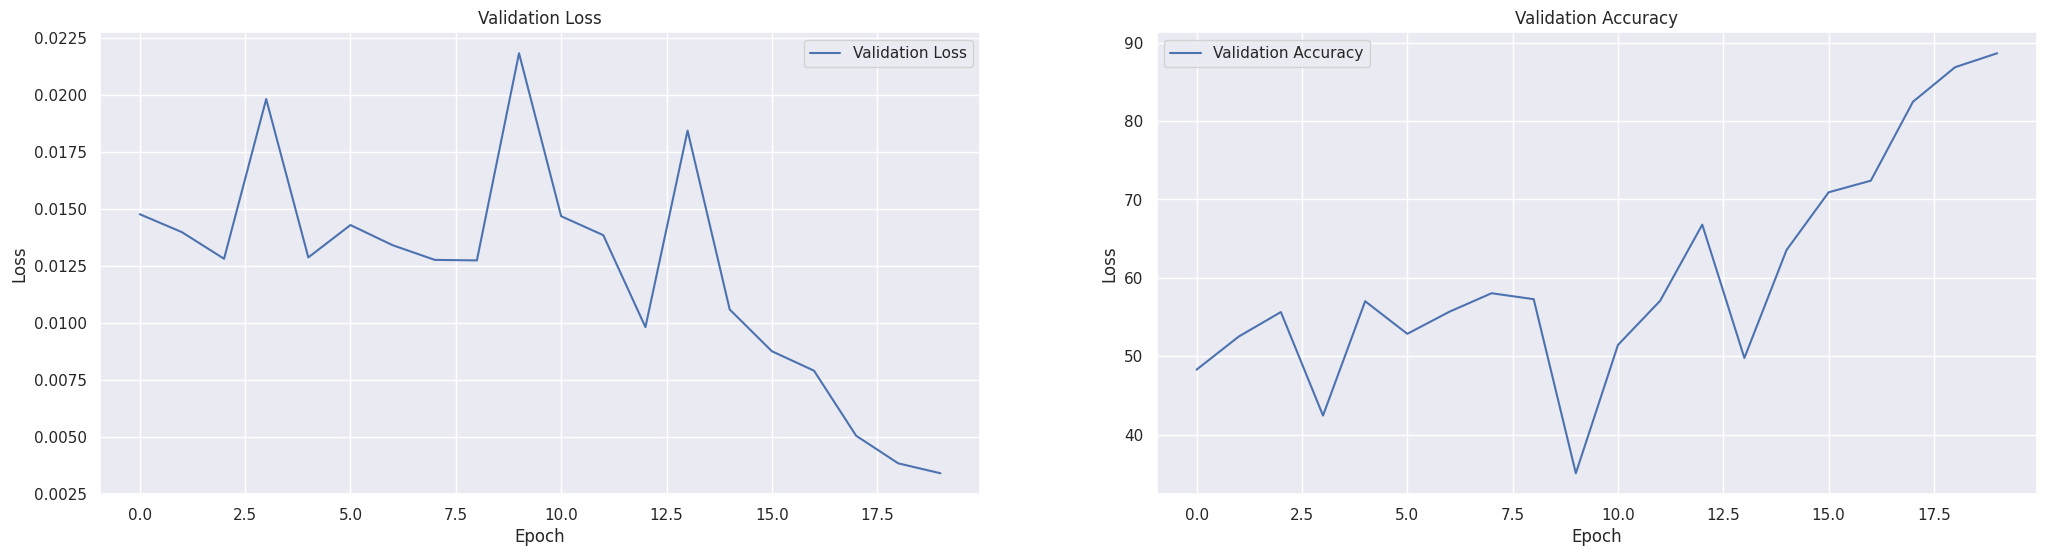



Plot misclassified images..
Total wrong predictions are 1134
Files already downloaded and verified


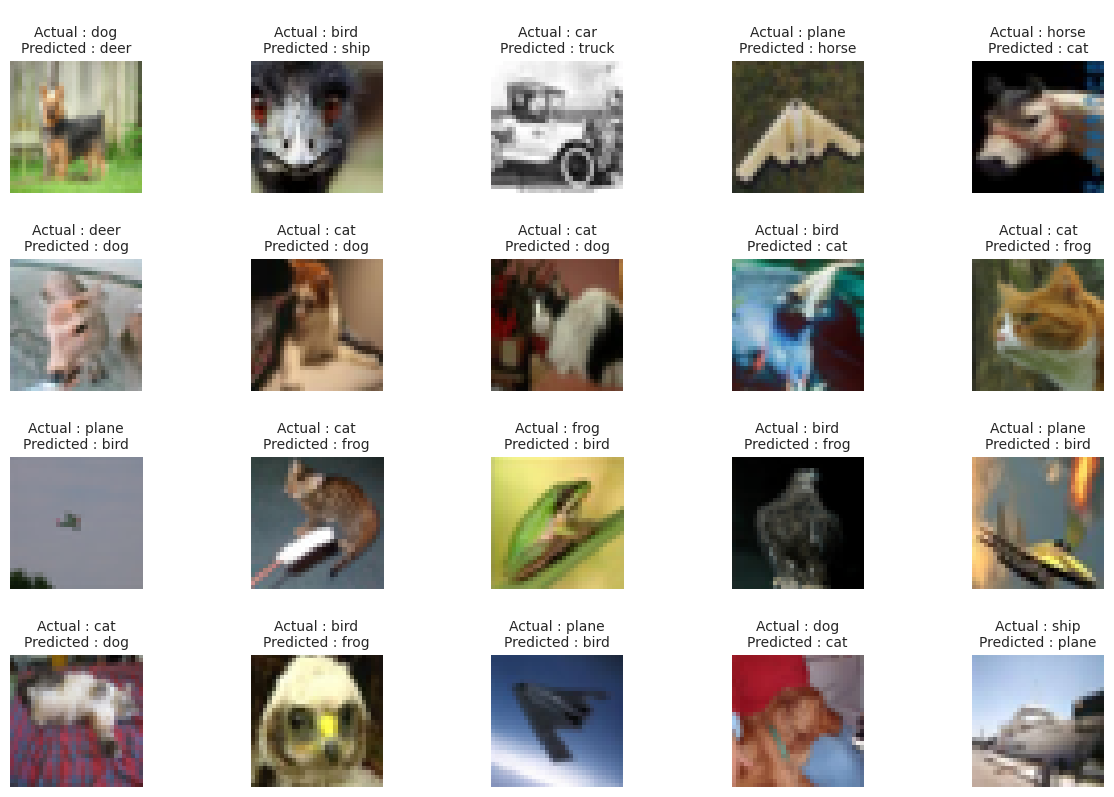



Plot gradCAM images..
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


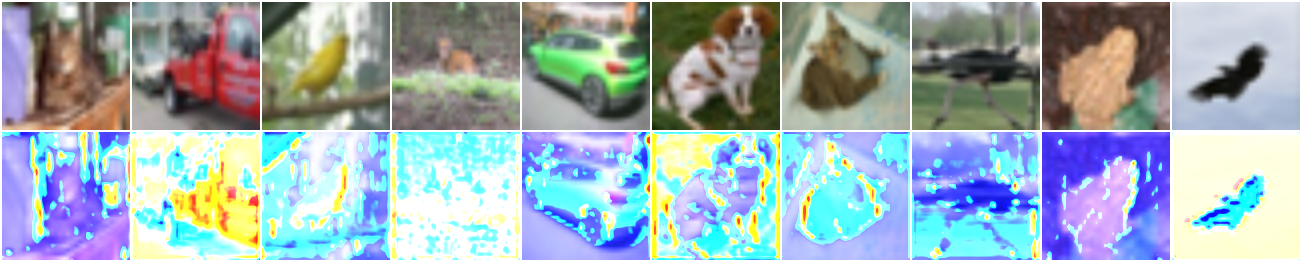



Display model accuracy for 10 classes..
Accuracy of plane : 92 %
Accuracy of   car : 97 %
Accuracy of  bird : 82 %
Accuracy of   cat : 73 %
Accuracy of  deer : 88 %
Accuracy of   dog : 81 %
Accuracy of  frog : 93 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %

DONE!


In [ ]:
# Run - to train ResNet18 model, predict, apply and plot Grad-CAM images
run_CiFAR_Resnet_GradCAM_process(args_2)
